In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [44]:
df = pd.read_csv('/content/student_habits_performance.csv')
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


In [45]:
df.shape

(1000, 16)

In [46]:
df.drop(['student_id'],axis=1,inplace=True)

In [47]:
print(df.duplicated().sum())

0


In [48]:
df.isnull().sum()

,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0
exercise_frequency,0


In [49]:
df['parental_education_level'].describe()

,parental_education_level
count,909
unique,3
top,High School
freq,392


In [50]:
df['parental_education_level'] = df['parental_education_level'].fillna(df['parental_education_level'].mode()[0])

In [51]:
df.isnull().sum()

,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0
exercise_frequency,0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1000 non-null   int64  
 1   gender                         1000 non-null   object 
 2   study_hours_per_day            1000 non-null   float64
 3   social_media_hours             1000 non-null   float64
 4   netflix_hours                  1000 non-null   float64
 5   part_time_job                  1000 non-null   object 
 6   attendance_percentage          1000 non-null   float64
 7   sleep_hours                    1000 non-null   float64
 8   diet_quality                   1000 non-null   object 
 9   exercise_frequency             1000 non-null   int64  
 10  parental_education_level       1000 non-null   object 
 11  internet_quality               1000 non-null   object 
 12  mental_health_rating           1000 non-null   in

In [53]:
for col in df.columns:
  print(col+":==========")
  print(df[col].value_counts())

age:==========
age
20    146
24    134
17    133
21    125
23    119
18    117
19    113
22    113
Name: count, dtype: int64
gender:==========
gender
Female    481
Male      477
Other      42
Name: count, dtype: int64
study_hours_per_day:==========
study_hours_per_day
3.5    38
3.2    36
4.3    35
3.3    34
3.8    31
       ..
7.5     1
8.2     1
7.6     1
0.1     1
7.1     1
Name: count, Length: 78, dtype: int64
social_media_hours:==========
social_media_hours
3.1    38
3.2    36
2.9    36
2.2    35
2.1    35
3.0    34
2.4    34
2.3    32
1.9    32
1.8    31
2.8    31
2.0    30
3.3    29
2.5    27
2.7    26
1.4    26
2.6    25
1.7    25
3.6    24
1.5    23
3.5    23
1.6    23
3.4    22
0.0    21
0.9    20
1.2    20
1.3    18
4.0    17
3.8    17
1.1    15
4.3    15
3.7    15
1.0    14
3.9    13
4.2    12
0.8    10
4.5    10
0.7    10
4.6    10
4.1     9
4.9     9
0.2     8
0.6     8
4.4     7
4.7     7
0.5     6
0.3     6
0.4     6
5.0     4
0.1     3
4.8     3
5.4     2
5.3     1
6.2 

In [54]:
df = df[df['gender'] != 'Other']
display(df.shape)

(958, 15)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 958 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            958 non-null    int64  
 1   gender                         958 non-null    object 
 2   study_hours_per_day            958 non-null    float64
 3   social_media_hours             958 non-null    float64
 4   netflix_hours                  958 non-null    float64
 5   part_time_job                  958 non-null    object 
 6   attendance_percentage          958 non-null    float64
 7   sleep_hours                    958 non-null    float64
 8   diet_quality                   958 non-null    object 
 9   exercise_frequency             958 non-null    int64  
 10  parental_education_level       958 non-null    object 
 11  internet_quality               958 non-null    object 
 12  mental_health_rating           958 non-null    int64  


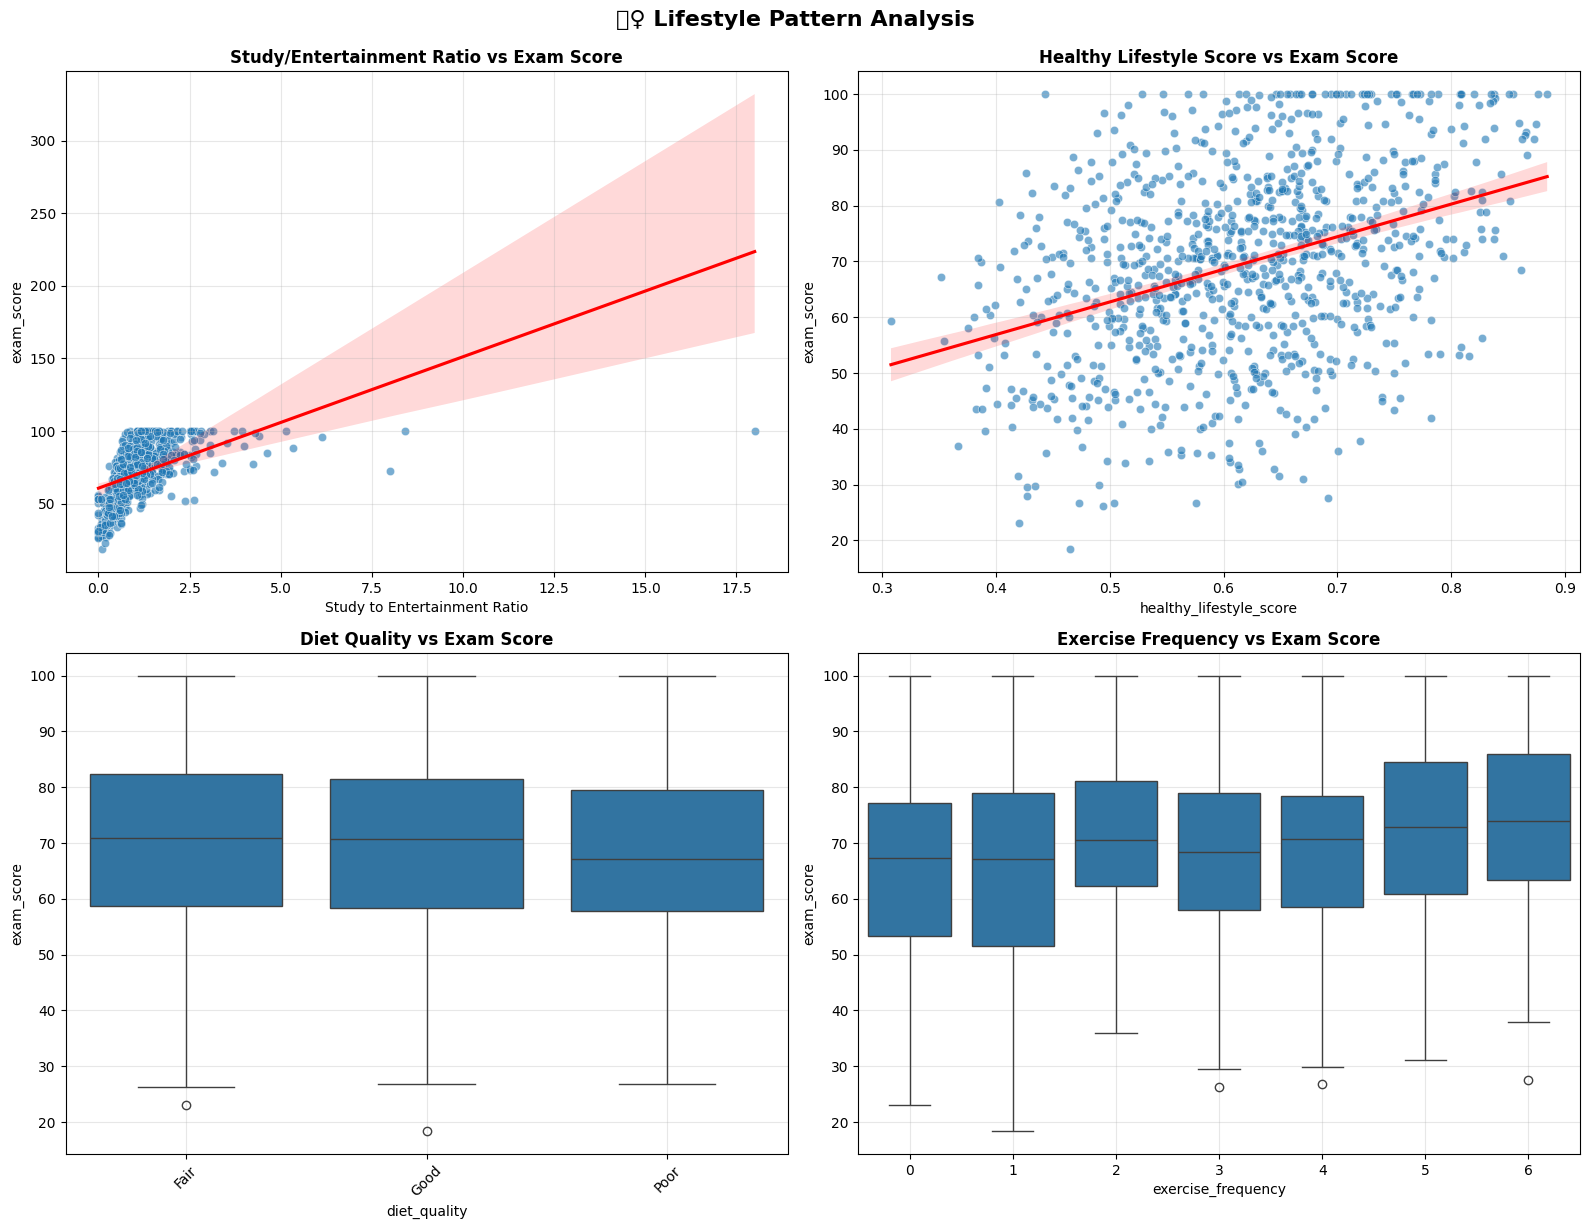


🔍 Lifestyle Metrics Correlations:
  • Study/Entertainment Ratio correlation: 0.498
  • Healthy Lifestyle Score correlation: 0.374


In [56]:
# Create lifestyle efficiency metrics
df['study_entertainment_ratio'] = df['study_hours_per_day'] / (df['social_media_hours'] + df['netflix_hours'] + 0.1)
df['healthy_lifestyle_score'] = (
    df['sleep_hours']/10 +
    df['exercise_frequency']/7 +
    df['mental_health_rating']/10 +
    df['attendance_percentage']/100
) / 4

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Study vs entertainment ratio
sns.scatterplot(data=df, x='study_entertainment_ratio', y='exam_score', ax=axes[0,0], alpha=0.6)
sns.regplot(data=df, x='study_entertainment_ratio', y='exam_score', ax=axes[0,0], scatter=False, color='red')
axes[0,0].set_title('Study/Entertainment Ratio vs Exam Score', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Study to Entertainment Ratio')

# Healthy lifestyle score
sns.scatterplot(data=df, x='healthy_lifestyle_score', y='exam_score', ax=axes[0,1], alpha=0.6)
sns.regplot(data=df, x='healthy_lifestyle_score', y='exam_score', ax=axes[0,1], scatter=False, color='red')
axes[0,1].set_title('Healthy Lifestyle Score vs Exam Score', fontsize=12, fontweight='bold')

# Diet quality impact
sns.boxplot(data=df, x='diet_quality', y='exam_score', ax=axes[1,0])
axes[1,0].set_title('Diet Quality vs Exam Score', fontsize=12, fontweight='bold')
axes[1,0].tick_params(axis='x', rotation=45)

# Exercise frequency detailed analysis
sns.boxplot(data=df, x='exercise_frequency', y='exam_score', ax=axes[1,1])
axes[1,1].set_title('Exercise Frequency vs Exam Score', fontsize=12, fontweight='bold')

for ax in axes.flatten():
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('🏃‍♀️ Lifestyle Pattern Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Calculate correlations for new metrics
ratio_corr = df['study_entertainment_ratio'].corr(df['exam_score'])
lifestyle_corr = df['healthy_lifestyle_score'].corr(df['exam_score'])

print(f"\n🔍 Lifestyle Metrics Correlations:")
print(f"  • Study/Entertainment Ratio correlation: {ratio_corr:.3f}")
print(f"  • Healthy Lifestyle Score correlation: {lifestyle_corr:.3f}")

In [57]:
df.columns

Index(['age', 'gender', 'study_hours_per_day', 'social_media_hours',
       'netflix_hours', 'part_time_job', 'attendance_percentage',
       'sleep_hours', 'diet_quality', 'exercise_frequency',
       'parental_education_level', 'internet_quality', 'mental_health_rating',
       'extracurricular_participation', 'exam_score',
       'study_entertainment_ratio', 'healthy_lifestyle_score'],
      dtype='object')

<Axes: xlabel='parental_education_level', ylabel='exam_score'>

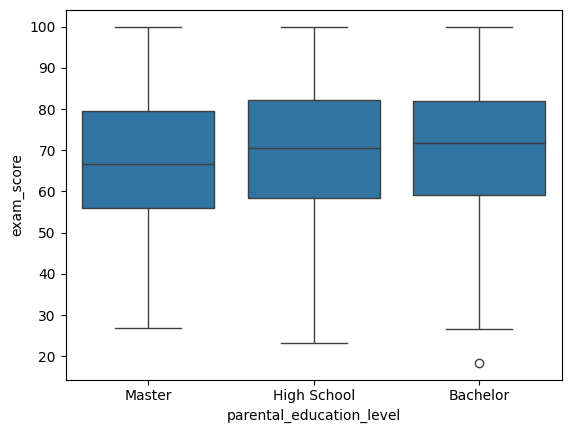

In [58]:
sns.boxplot(data=df, x='parental_education_level', y='exam_score')

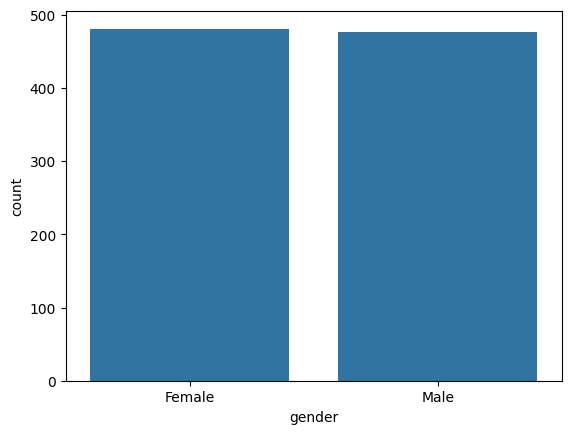

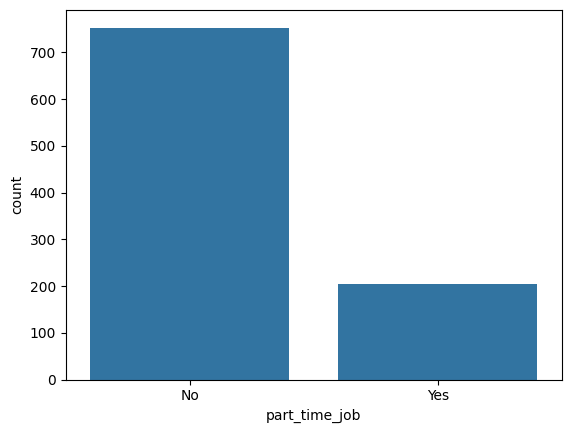

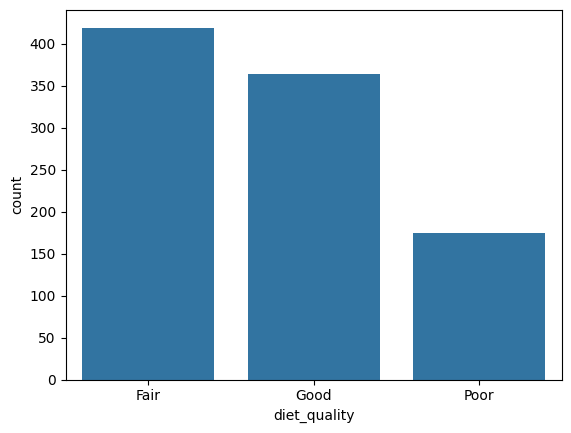

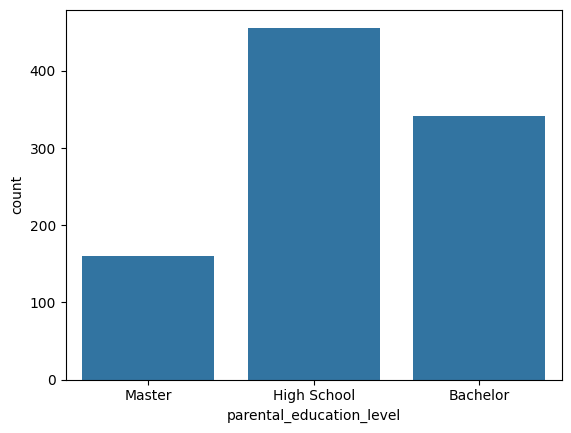

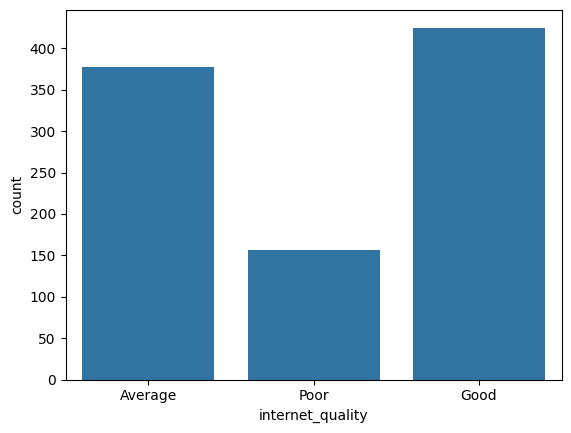

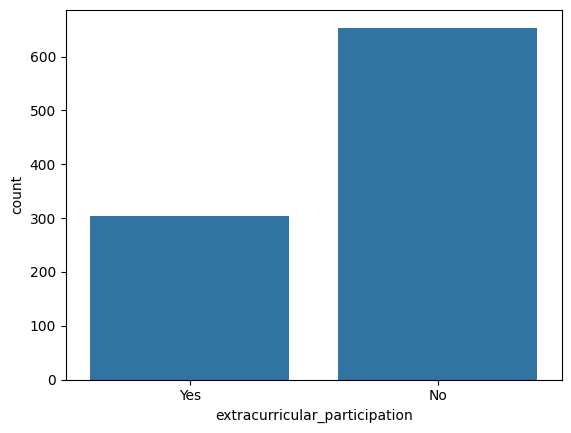

In [59]:
df_def = df.select_dtypes(include='object').columns
for col in df_def:
  sns.countplot(x=df[col])
  plt.show()

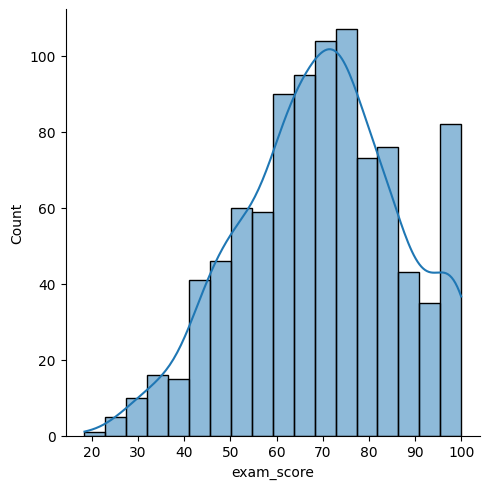

In [60]:
sns.displot(data = df, x='exam_score',kde = True)

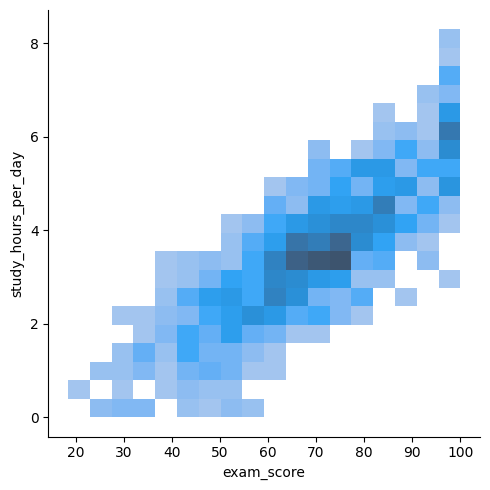

In [61]:
sns.displot(data = df, x='exam_score', y='study_hours_per_day')

## **Encoding**

One-Hot-Encoding:
gender, part_time_job,

In [62]:
categorical_col = df.select_dtypes(include='object').columns
categorical_col


Index(['gender', 'part_time_job', 'diet_quality', 'parental_education_level',
       'internet_quality', 'extracurricular_participation'],
      dtype='object')

In [63]:
for col in df[['diet_quality','parental_education_level','internet_quality']]:
  print(col+":==========")
  print(df[col].value_counts())

diet_quality:==========
diet_quality
Fair    419
Good    364
Poor    175
Name: count, dtype: int64
parental_education_level:==========
parental_education_level
High School    456
Bachelor       342
Master         160
Name: count, dtype: int64
internet_quality:==========
internet_quality
Good       425
Average    377
Poor       156
Name: count, dtype: int64


In [64]:
df['diet_quality'] = df['diet_quality'].map({'Good':2,'Fair':1,'Poor':0})
df['parental_education_level'] = df['parental_education_level'].map({'High School':0, 'Bachelor':1, 'Master':2})
df['internet_quality'] = df['internet_quality'].map({'Good':2,'Average':1,'Poor':0})

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 958 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            958 non-null    int64  
 1   gender                         958 non-null    object 
 2   study_hours_per_day            958 non-null    float64
 3   social_media_hours             958 non-null    float64
 4   netflix_hours                  958 non-null    float64
 5   part_time_job                  958 non-null    object 
 6   attendance_percentage          958 non-null    float64
 7   sleep_hours                    958 non-null    float64
 8   diet_quality                   958 non-null    int64  
 9   exercise_frequency             958 non-null    int64  
 10  parental_education_level       958 non-null    int64  
 11  internet_quality               958 non-null    int64  
 12  mental_health_rating           958 non-null    int64  


In [66]:
df = pd.get_dummies(df,columns=['gender','part_time_job','extracurricular_participation'], drop_first=True)

In [67]:
df

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,exam_score,study_entertainment_ratio,healthy_lifestyle_score,gender_Male,part_time_job_Yes,extracurricular_participation_Yes
0,23,0.0,1.2,1.1,85.0,8.0,1,6,2,1,8,56.2,0.000000,0.826786,False,False,True
1,20,6.9,2.8,2.3,97.3,4.6,2,6,0,1,8,100.0,1.326923,0.772536,False,False,False
2,21,1.4,3.1,1.3,94.8,8.0,0,1,0,0,1,34.3,0.311111,0.497714,True,False,False
3,23,1.0,3.9,1.0,71.0,9.2,0,4,2,2,1,26.8,0.200000,0.575357,False,False,True
4,19,5.0,4.4,0.5,90.9,4.9,1,3,2,2,1,66.4,1.000000,0.481893,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,2.6,0.5,1.6,77.0,7.5,1,2,0,2,6,76.1,1.181818,0.601429,False,False,True
996,17,2.9,1.0,2.4,86.0,6.8,0,1,0,1,6,65.9,0.828571,0.570714,False,True,True
997,20,3.0,2.6,1.3,61.9,6.5,2,5,1,2,9,64.4,0.750000,0.720821,True,False,True
998,24,5.4,4.1,1.1,100.0,7.6,1,0,1,1,1,69.7,1.018868,0.465000,True,True,False


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 958 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                958 non-null    int64  
 1   study_hours_per_day                958 non-null    float64
 2   social_media_hours                 958 non-null    float64
 3   netflix_hours                      958 non-null    float64
 4   attendance_percentage              958 non-null    float64
 5   sleep_hours                        958 non-null    float64
 6   diet_quality                       958 non-null    int64  
 7   exercise_frequency                 958 non-null    int64  
 8   parental_education_level           958 non-null    int64  
 9   internet_quality                   958 non-null    int64  
 10  mental_health_rating               958 non-null    int64  
 11  exam_score                         958 non-null    float64
 12 

<Axes: >

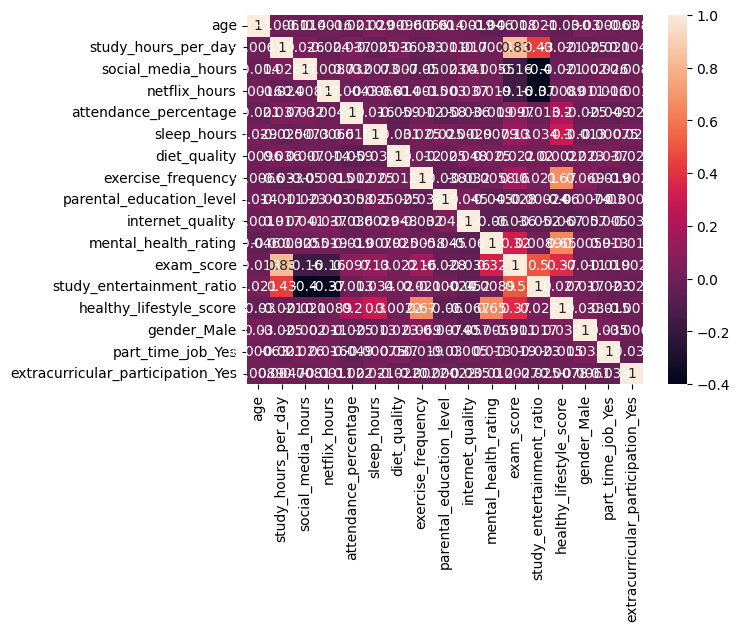

In [69]:
sns.heatmap(df.corr(), annot=True)

# **Split Data**

In [70]:
x = df.drop('exam_score',axis=1)
y = df['exam_score']

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# **Scale Date**

In [71]:
from sklearn.preprocessing import StandardScaler
SdS = StandardScaler()
x = SdS.fit_transform(x)
x.shape

(958, 16)

# **Training Model**

In [73]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

In [74]:
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
}

In [75]:
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"{name} → R²: {r2_score(y_test, y_pred):.3f}, MSE: {mean_squared_error(y_test, y_pred):.2f}")

Linear → R²: 0.905, MSE: 26.07
Ridge → R²: 0.905, MSE: 26.07
Lasso → R²: 0.906, MSE: 25.98
Random Forest → R²: 0.865, MSE: 37.20
